In [27]:
import pandas as pd
import numpy as np


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = sns.load_dataset('titanic')

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
df.drop(['class', 'alive'], axis = 1, inplace = True)

In [33]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,Southampton,True


### Exploratory Analysis

In [34]:
null_numb = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_numb.append(x)
    

In [35]:
null_numb

[0, 0, 0, 177, 0, 0, 0, 2, 0, 0, 688, 2, 0]

In [36]:
null_numbers= pd.DataFrame(null_numb, index = df.columns, columns = ['Total missing values'])

In [37]:
null_numbers

,Total missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
who,0
adult_male,0


<Axes: xlabel='deck', ylabel='count'>

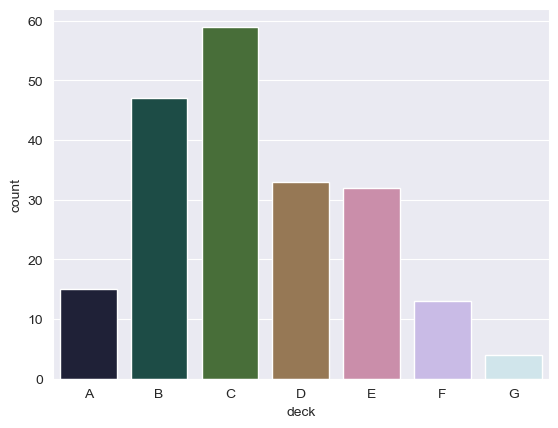

In [38]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'deck', data = df, palette = 'cubehelix')

<Axes: xlabel='deck', ylabel='count'>

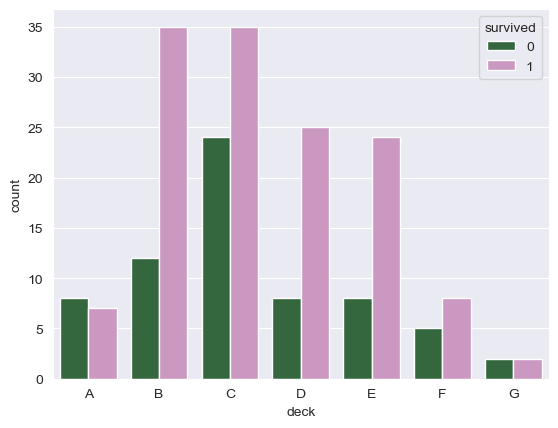

In [39]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'deck',hue = 'survived', data = df, palette = 'cubehelix')

In [40]:
df.drop(['deck'], axis =1, inplace = True)

<Axes: xlabel='pclass', ylabel='age'>

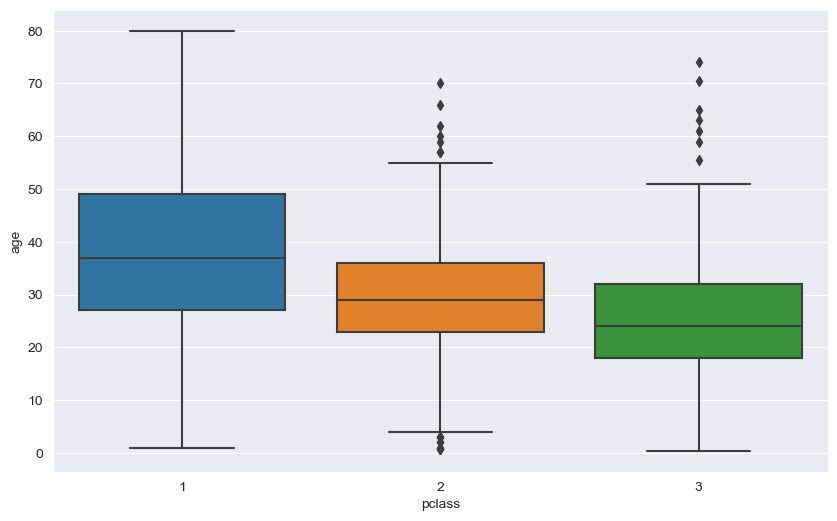

In [41]:
plt.figure(figsize = (10, 6))
sns.boxplot(x ='pclass', y = 'age', data = df)

In [42]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        if pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

        

In [43]:
df.age = df[['age', 'pclass']].apply(fillna_age, axis = 1)

In [44]:
null_numbers

,Total missing values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
who,0
adult_male,0


In [45]:
df['age'].isnull().sum()

0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
 11  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(4)
memory usage: 71.5+ KB


In [47]:
df.dropna(inplace = True)

<Axes: >

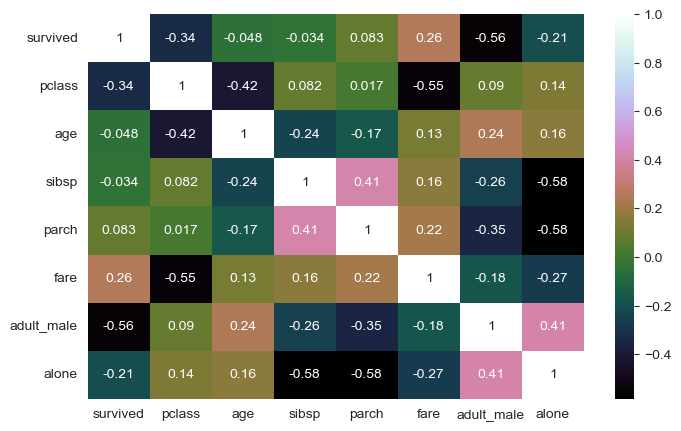

In [48]:
plt.figure(figsize = (8, 5))
sns.heatmap(df.corr(numeric_only = True), cmap = 'cubehelix', annot = True)

<Axes: xlabel='survived', ylabel='count'>

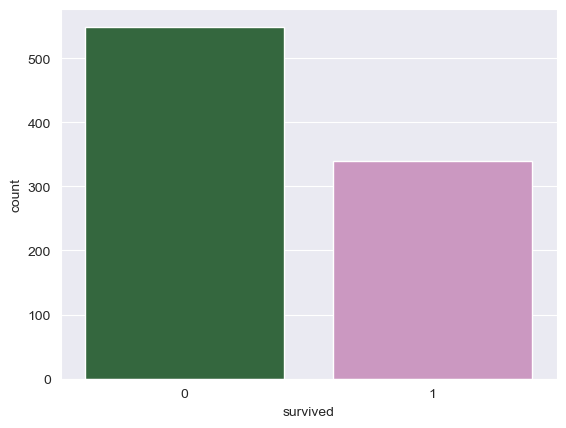

In [50]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'survived', data = df, palette = 'cubehelix')

In [51]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

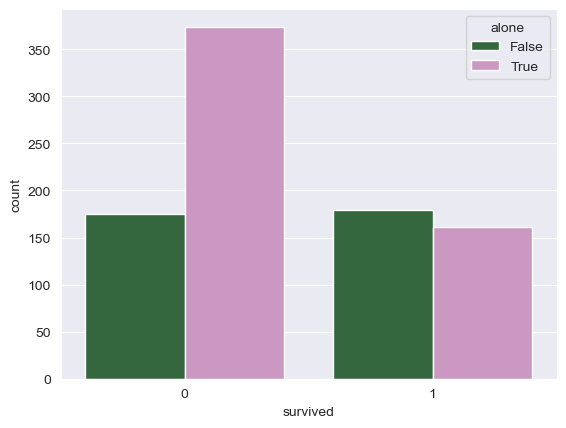

In [52]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'survived',hue = 'alone', data = df, palette = 'cubehelix')

<Axes: xlabel='survived', ylabel='count'>

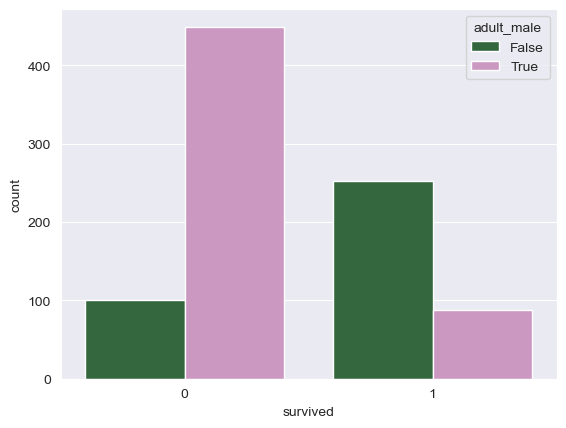

In [53]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'survived',hue = 'adult_male', data = df, palette = 'cubehelix')

<Axes: xlabel='survived', ylabel='count'>

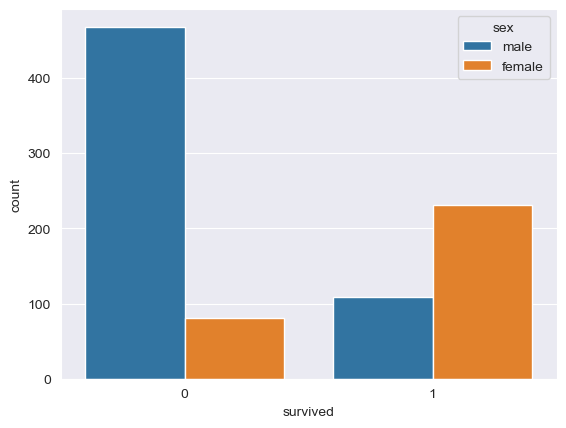

In [54]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'survived',hue = 'sex', data = df)

<Axes: xlabel='survived', ylabel='count'>

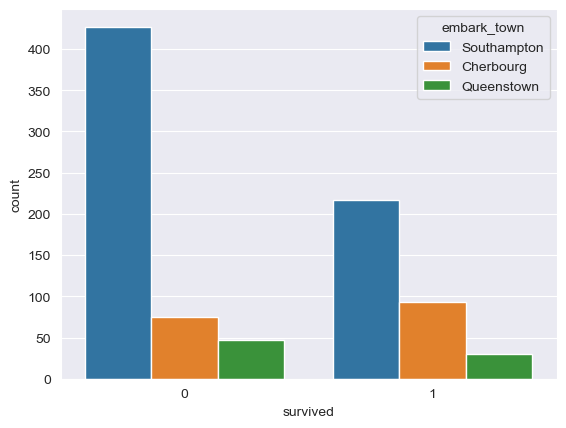

In [55]:
sns.set_style(('darkgrid'))
sns.countplot(x = 'survived',hue = 'embark_town', data = df)

In [56]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64